## Задача
Есть данные в таком виде:
id, цена за 1 выполненную работу, количество работ,

Необходимо:
1) получить ведомость оплаты: id - сумма
2) найти id, которые заработали больше других и в сумме заработали 60% денег
3) предложить свой метод поиска тех, кто заработал слишком много, с целью обнаружить неточность / подлог в исходных данных.

Для решения использовать pandas, приложить код с комментариями.
Файл с данными: https://drive.google.com/open?id=1OX0Dw3ikIU3ifp7Z34XVyQS2xy5RKlhQ

## Решение

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('test_pandas.csv')

### 1) Ведомость оплаты: id - сумма

In [3]:
data['total'] = data['price_per_job']*data['jobs_made']

### Ответ

In [4]:
data[['uid', 'total']] #столбец "total" цена за все выполненные работы по каждому id
data.to_csv('out.csv', index=False) #вывод файла с данными
data

,uid,price_per_job,jobs_made,total
0,3,0.03,1,0.03
1,3,0.10,2,0.20
2,3,0.10,2,0.20
3,3,0.15,1,0.15
4,3,1.00,4,4.00
...,...,...,...,...
79519,116071,0.20,46,9.20
79520,117313,0.20,58,11.60
79521,156275,0.20,53,10.60
79522,156277,0.20,28,5.60


### 2) id, которые заработали больше других и в сумме заработали 60% денег

In [5]:
data['max_uid'] = data['total'] > (sum(data['total'])/len(data['total']))
data.head()

,uid,price_per_job,jobs_made,total,max_uid
0,3,0.03,1,0.03,False
1,3,0.10,2,0.20,False
2,3,0.10,2,0.20,False
3,3,0.15,1,0.15,False
4,3,1.00,4,4.00,False


In [6]:
#столбец "max_uid" со значениями True/False, где True это id, которые по среднему арифметическому заработали больше других
data.max_uid.unique()

array([False,  True])

In [7]:
max_uid_true=data[data['max_uid']==True]
max_uid_true

,uid,price_per_job,jobs_made,total,max_uid
10,5,0.55,58,31.90,True
13,5,0.55,51,28.05,True
22,35,0.55,458,251.90,True
23,35,0.30,350,105.00,True
25,35,0.55,121,66.55,True
...,...,...,...,...,...
79512,2901,0.20,149,29.80,True
79514,6236,0.20,193,38.60,True
79515,6239,0.20,536,107.20,True
79517,112439,0.20,147,29.40,True


### Ответ:

In [8]:
#id, которые заработали в среднем больше остальных

uid_true = pd.unique(max_uid_true['uid']).tolist()
print('%s — Количество id, которые заработали в среднем больше остальных\n'%len(uid_true))
print('id, которые заработали в среднем больше остальных\n\n', uid_true)

1425 — Количество id, которые заработали в среднем больше остальных

id, которые заработали в среднем больше остальных

 [5, 35, 68, 179, 187, 196, 197, 578, 581, 689, 779, 912, 1128, 1132, 1200, 1732, 1733, 1738, 1740, 2040, 2443, 2464, 2550, 2865, 2901, 2951, 2962, 3211, 3832, 5269, 5426, 5453, 5462, 5465, 5474, 5943, 5964, 6095, 6236, 6239, 6249, 6288, 7715, 7815, 8766, 9102, 9196, 10162, 10681, 10874, 11688, 14217, 20013, 26492, 29387, 32116, 35665, 38156, 47157, 47169, 82607, 111831, 112439, 112445, 112450, 113664, 116071, 116268, 117313, 117832, 117852, 118174, 119793, 120297, 121496, 121784, 123500, 124762, 128100, 128249, 130205, 130731, 131737, 131966, 132408, 136721, 139454, 139870, 142394, 142818, 143160, 143161, 143381, 143477, 143671, 144035, 144044, 144864, 144943, 145147, 146865, 147159, 147250, 147734, 147875, 148025, 148497, 148684, 149449, 149667, 149858, 150772, 150895, 151137, 151330, 151484, 154049, 154065, 156228, 156275, 156277, 156452, 158204, 158206, 159008, 16

In [10]:
data['max_uid_60pr'] = data['total'] >= (sum(data['total'])*60)/100
max_uid_60pr = pd.unique(data['max_uid_60pr'])
print('%s — нет id, которые в сумме заработали 60%% или больше\n'%max_uid_60pr)
data.head()

[False] — нет id, которые в сумме заработали 60% или больше



,uid,price_per_job,jobs_made,total,max_uid,max_uid_60pr
0,3,0.03,1,0.03,False,False
1,3,0.10,2,0.20,False,False
2,3,0.10,2,0.20,False,False
3,3,0.15,1,0.15,False,False
4,3,1.00,4,4.00,False,False


### 3) метод поиска тех, кто заработал слишком много, с помощью нахождения экстремумов

In [11]:
# отфильтровала наблюдения по топ-5 стоимости за работу

df = data[data.uid.isin(data.uid.value_counts().head(5).index)]

df.price_per_job.describe()

count    1683.000000
mean        0.264082
std         0.162584
min         0.100000
25%         0.100000
50%         0.200000
75%         0.350000
max         0.550000
Name: price_per_job, dtype: float64

#### График боксплот по топ-5 id за стоимость одной работы

На графике горизонтальная черта означают медиану. Как видно, 4 id из 5 имеют одинаковое среднее значение, приближены к минимальному значению по стоимости за работу. Выбросов нет.

id 7715 выделяется из топ списка по стоимости работы.

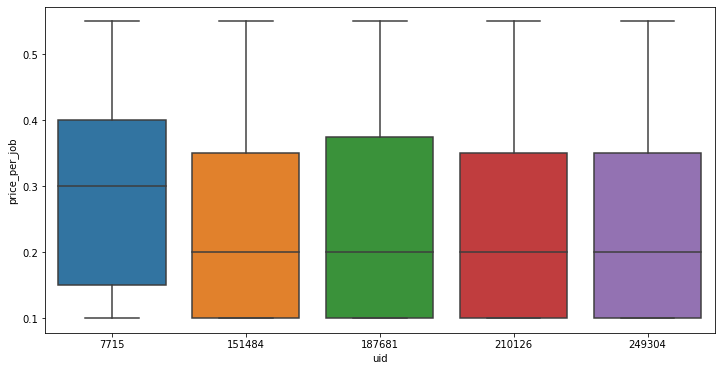

In [14]:
# построила boxplot
fig, ax = plt.subplots(figsize=(12,6))  
sns.boxplot(
    x='uid',
    y='price_per_job',
    data=df
)

---